# Assigment2: Who Survived the Titanic?

### For this assignment, we will analyze the open dataset with real data on the passengers aboard the Titanic

In [1]:
#from IPython.core.interactiveshell import InteractiveShell
#InteractiveShell.ast_node_interactivity = "all"

In [2]:
%matplotlib inline
import pandas as pd
from pandas import Series, DataFrame
import numpy as np
np.random.seed(12345)
import matplotlib.pyplot as plt
plt.rc('figure', figsize=(10, 6))
PREVIOUS_MAX_ROWS = pd.options.display.max_rows
pd.options.display.max_rows = 20
np.set_printoptions(precision=4, suppress=True)
import seaborn as sns

Download the data from Kaggle website: file “train.csv”

### 1. Read the data from the file into pandas dataframe

In [3]:
data = pd.read_csv('train.csv')

In [4]:
data.columns= map(str.lower, data.columns)

### 2. Analyze, clean and transform the data 

#### 2.1 Analyze the data 

In [5]:
data.head(5)

,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Variable	Definition	Key
survival	Survival	0 = No, 1 = Yes
pclass	Ticket class	1 = 1st, 2 = 2nd, 3 = 3rd
sex	Sex	
Age	Age in years	
sibsp	# of siblings / spouses aboard the Titanic	
parch	# of parents / children aboard the Titanic	
ticket	Ticket number	
fare	Passenger fare	
cabin	Cabin number	
embarked	Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton
Variable Notes

pclass: A proxy for socio-economic status (SES)
1st = Upper
2nd = Middle
3rd = Lower

age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

sibsp: The dataset defines family relations in this way...
Sibling = brother, sister, stepbrother, stepsister
Spouse = husband, wife (mistresses and fiancés were ignored)

parch: The dataset defines family relations in this way...
Parent = mother, father
Child = daughter, son, stepdaughter, stepson
Some children travelled only with a nanny, therefore parch=0 for them.

Let's check the dimensionality of data and also generates descriptive statistics to a have a high-level simple statistical description of the numerical features

In [6]:
data.shape

(891, 12)

In [7]:
data.describe()

,passengerid,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
# To find all the missing values in the data frame
data.isnull().sum().sort_values(ascending=False)

cabin          687
age            177
embarked         2
fare             0
ticket           0
parch            0
sibsp            0
sex              0
name             0
pclass           0
survived         0
passengerid      0
dtype: int64

#### 2.2 Clean the data

In [9]:
# Complete or clean the missing value for 'age','embarked'
data['age'] = data['age'].fillna(data['age'].median()) #complete missing age with median
data['embarked'] = data['embarked'].fillna(data['embarked'].mode()[0]) #complete missing embarked with mode

In [10]:
data.drop(['passengerid','cabin', 'ticket'], axis=1, inplace = True) # clean the data by removing unuseful data

In [11]:
data.isnull().sum().sort_values(ascending=False)

embarked    0
fare        0
parch       0
sibsp       0
age         0
sex         0
name        0
pclass      0
survived    0
dtype: int64

In [12]:
data.head(5)

,survived,pclass,name,sex,age,sibsp,parch,fare,embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S


#### 2.3 Transform data

In [13]:
# Add family size column which is the sum of 'sibsp' and 'parch'
data['family']=data['sibsp']+data['parch']

In [14]:
# Add isAlone feature which indicates that the passenger has onboraded alone with of other family members
data['isAlone'] = [0 if x >=1 else 1 for x in data['family']]

In [15]:
# Add title feature which indicates the title of the passenger
data['title'] = data['name'].str.split(", ", expand=True)[1].str.split(".", expand=True)[0]

In [16]:
# Use pandas qcut method to bin the passengers into several fare groups.  Number of people in each group are similar.
data['fareRank'] = pd.qcut(data['fare'].astype(int), 6, labels=False)
data['fareBin'] = pd.qcut(data['fare'].astype(int), 6)
pd.qcut(data['fare'], 6).value_counts()
#data.head()

(-0.001, 7.775]      156
(7.775, 8.662]       152
(52.369, 512.329]    149
(14.454, 26.0]       149
(26.0, 52.369]       146
(8.662, 14.454]      139
Name: fare, dtype: int64

In [17]:
# Use pandas cut method to bin the passengers into several age groups.  Number of people in each group are uneven.
data['ageRank'] = pd.cut(data['age'].astype(int),8, labels=False)
data['ageBin'] = pd.cut(data['age'].astype(int),8)
data.head()
pd.cut(data['age'], 8).value_counts()
data

,survived,pclass,name,sex,age,sibsp,parch,fare,embarked,family,isAlone,title,fareRank,fareBin,ageRank,ageBin
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,1,0,Mr,0,"(-0.001, 7.0]",2,"(20.0, 30.0]"
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,1,0,Mrs,5,"(52.0, 512.0]",3,"(30.0, 40.0]"
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,0,1,Miss,0,"(-0.001, 7.0]",2,"(20.0, 30.0]"
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,1,0,Mrs,5,"(52.0, 512.0]",3,"(30.0, 40.0]"
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,0,1,Mr,1,"(7.0, 8.0]",3,"(30.0, 40.0]"
5,0,3,"Moran, Mr. James",male,28.0,0,0,8.4583,Q,0,1,Mr,1,"(7.0, 8.0]",2,"(20.0, 30.0]"
6,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,51.8625,S,0,1,Mr,4,"(26.0, 52.0]",5,"(50.0, 60.0]"
7,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,21.0750,S,4,0,Master,3,"(14.0, 26.0]",0,"(-0.08, 10.0]"
8,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,11.1333,S,2,0,Mrs,2,"(8.0, 14.0]",2,"(20.0, 30.0]"
9,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,30.0708,C,1,0,Mrs,4,"(26.0, 52.0]",1,"(10.0, 20.0]"


In [18]:
data.isnull().sum()

survived    0
pclass      0
name        0
sex         0
age         0
sibsp       0
parch       0
fare        0
embarked    0
family      0
isAlone     0
title       0
fareRank    0
fareBin     0
ageRank     0
ageBin      0
dtype: int64

### 3. Data visualization and exploratory data analysis

First let's use boxplots to display distributions of data for 'Fare', 'Age' and 'Family Size'. This can help us to see
the median, quartiles, min/max , and potencial outliers.

Text(0,0.5,'Family Size (#)')

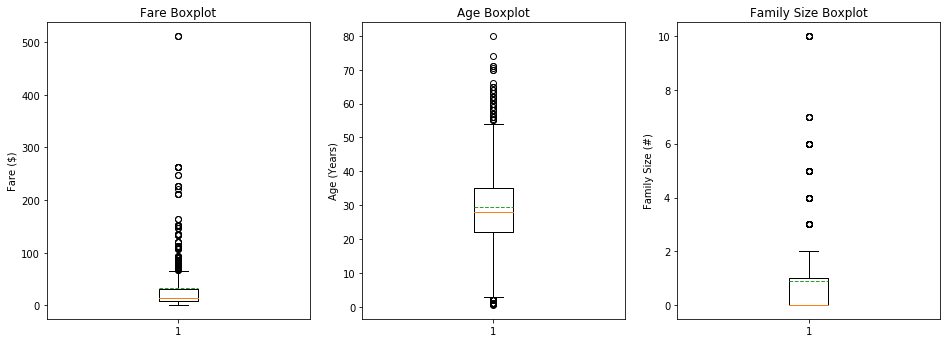

In [19]:
plt.figure(figsize=[16,12])

plt.subplot(231)
plt.boxplot(x=data['fare'], showmeans = True, meanline = True)
plt.title('Fare Boxplot')
plt.ylabel('Fare ($)')

plt.subplot(232)
plt.boxplot(data['age'], showmeans = True, meanline = True)
plt.title('Age Boxplot')
plt.ylabel('Age (Years)')

plt.subplot(233)
plt.boxplot(data['family'], showmeans = True, meanline = True)
plt.title('Family Size Boxplot')
plt.ylabel('Family Size (#)')

Finding: 

Based on the boxplot, we can see that most of tickets were sold at a low fare (under 50 dollar); the average and median of age were both around 30 years old; the family size of passengeers were small, most of them were traveling alone. 

Next, let's visualize more distributions of quantitative data regarding fare, age, family and gender

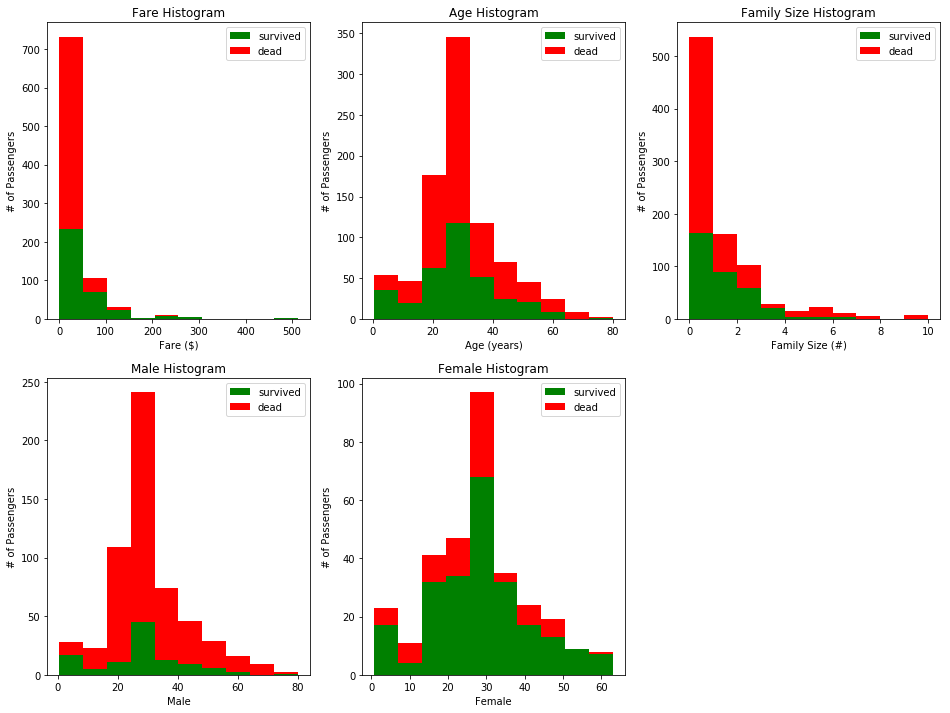

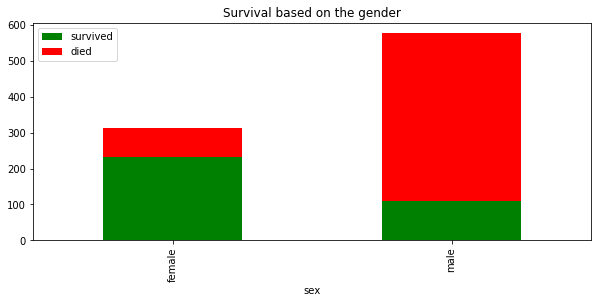

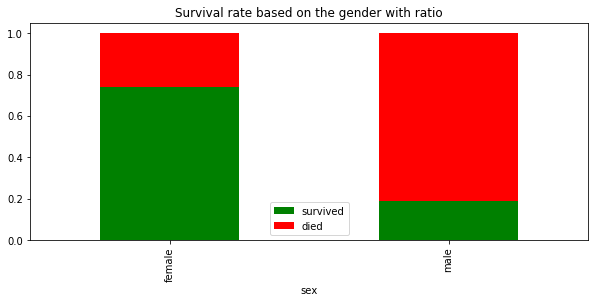

In [20]:
plt.figure(figsize=[16,12])

plt.subplot(231)
plt.hist(x = [data[data['survived']==1]['fare'], data[data['survived']==0]['fare']], 
         stacked=True, color = ['g','r'],label = ['survived','dead'])
plt.title('Fare Histogram')
plt.xlabel('Fare ($)')
plt.ylabel('# of Passengers')
plt.legend()

plt.subplot(232)
plt.hist(x = [data[data['survived']==1]['age'], data[data['survived']==0]['age']], 
         stacked=True, color = ['g','r'],label = ['survived','dead'])
plt.title('Age Histogram')
plt.xlabel('Age (years)')
plt.ylabel('# of Passengers')
plt.legend()

plt.subplot(233)
plt.hist(x = [data[data['survived']==1]['family'], data[data['survived']==0]['family']], 
         stacked=True, color = ['g','r'],label = ['survived','dead'])
plt.title('Family Size Histogram')
plt.xlabel('Family Size (#)')
plt.ylabel('# of Passengers')
plt.legend()

plt.subplot(234)
plt.hist(x = [data[(data['sex']=='male')&(data['survived']==1)]['age'], data[(data['sex']=='male')&(data['survived']==0)]['age']], 
         stacked=True, color = ['g','r'],label = ['survived','dead'])
plt.title('Male Histogram')
plt.xlabel('Male')
plt.ylabel('# of Passengers')
plt.legend()

plt.subplot(235)
plt.hist(x = [data[(data['sex']=='female')&(data['survived']==1)]['age'], data[(data['sex']=='female')&(data['survived']==0)]['age']], 
         stacked=True, color = ['g','r'],label = ['survived','dead'])
plt.title('Female Histogram')
plt.xlabel('Female')
plt.ylabel('# of Passengers')
plt.legend()


data['died'] = 1 - data['survived']
data.groupby('sex').agg('sum')[['survived','died']].plot(title='Survival based on the gender',kind='bar', figsize=(10, 4), stacked=True, color=['g', 'r'])
data.groupby('sex').agg('mean')[['survived','died']].plot(title='Survival rate based on the gender with ratio', kind='bar', figsize=(10, 4), stacked=True, color=['g', 'r'])


Thoughts on histograms:
    
    1: The survival rate is higher for passengers who hold expansive tickets
    2: Kids and teens have higher survival rate
    3: Passengers have small to median family size have higher survial rate
    4: Male passengers have a significant lower chance of survial than female passengers across all ages

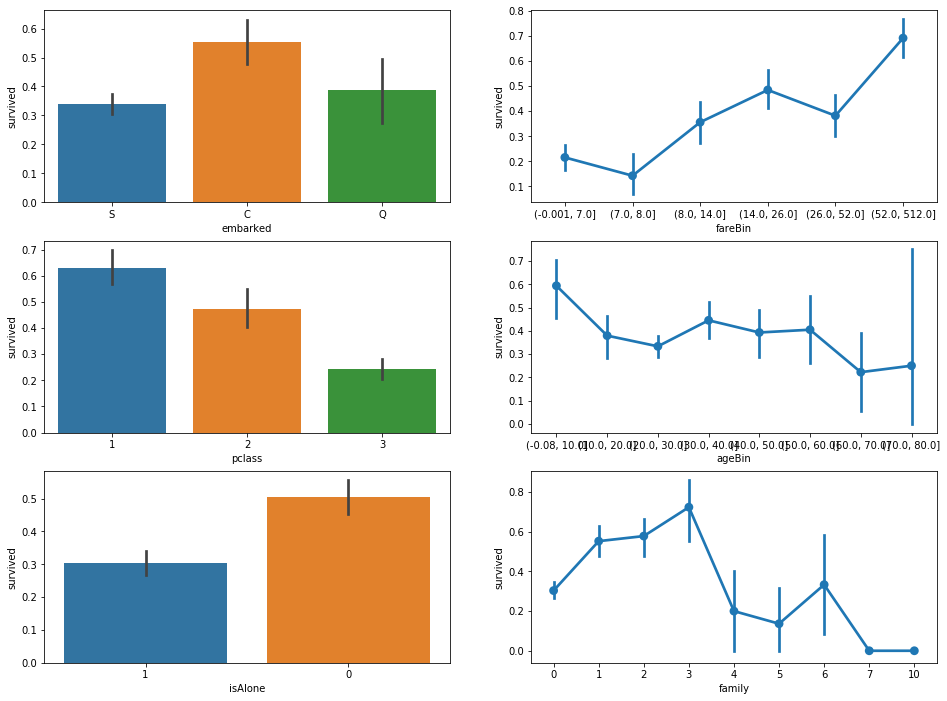

In [21]:
fig, saxis = plt.subplots(3, 2,figsize=(16,12))

sns.barplot(x = 'embarked', y = 'survived', data=data, ax = saxis[0,0])
sns.barplot(x = 'pclass', y = 'survived', order=[1,2,3], data=data, ax = saxis[1,0])
sns.barplot(x = 'isAlone', y = 'survived', order=[1,0], data=data, ax = saxis[2,0])

sns.pointplot(x = 'fareBin', y = 'survived',  data=data, ax = saxis[0,1])
sns.pointplot(x = 'ageBin', y = 'survived',  data=data, ax = saxis[1,1])
sns.pointplot(x = 'family', y = 'survived', data=data, ax = saxis[2,1])

Finding:

    1: The point of embarkation does not influence survival rate 
    2: Passengers in higher class (eg. class 1) have higher survival rate than the ones in lower class (eg. class 3)
    3: Passenger who travels alone is less likely to survive 
    4: The higher fare of ticket, the higher chance to survive
    5: The older the age, the lower chance to survive
    6: The survival rate becomes higher if a passenger has small to midium family size (1-3), but the chance drops when the family size exceeds 3 (the effect is not consistant or insignificant) 

### You might include the following attributes in your analysis:
- Passenger age
- Passenger gender
- Cabin class the passenger travelled in (variable ‘ticket class’)

In [22]:
# Let's create a new dataframe which includes atrributes like age, gender, class and so on. 
final_data = data.loc[:,['age','sex','pclass','ageBin','ageRank','fareBin','fareRank','survived']]
# Create a new attribute onBoard for counting the total passengers for each gender group
final_data['onBoard']=1

In [23]:
final_data.isnull().sum()

age         0
sex         0
pclass      0
ageBin      0
ageRank     0
fareBin     0
fareRank    0
survived    0
onBoard     0
dtype: int64

In [24]:
final_data.head(10)

,age,sex,pclass,ageBin,ageRank,fareBin,fareRank,survived,onBoard
0,22.0,male,3,"(20.0, 30.0]",2,"(-0.001, 7.0]",0,0,1
1,38.0,female,1,"(30.0, 40.0]",3,"(52.0, 512.0]",5,1,1
2,26.0,female,3,"(20.0, 30.0]",2,"(-0.001, 7.0]",0,1,1
3,35.0,female,1,"(30.0, 40.0]",3,"(52.0, 512.0]",5,1,1
4,35.0,male,3,"(30.0, 40.0]",3,"(7.0, 8.0]",1,0,1
5,28.0,male,3,"(20.0, 30.0]",2,"(7.0, 8.0]",1,0,1
6,54.0,male,1,"(50.0, 60.0]",5,"(26.0, 52.0]",4,0,1
7,2.0,male,3,"(-0.08, 10.0]",0,"(14.0, 26.0]",3,0,1
8,27.0,female,3,"(20.0, 30.0]",2,"(8.0, 14.0]",2,1,1
9,14.0,female,2,"(10.0, 20.0]",1,"(26.0, 52.0]",4,1,1


In [25]:
# get the detail interval of bins for labeling axis in the future
final_data['fareBin'].unique().sort_values()

[(-0.001, 7.0], (7.0, 8.0], (8.0, 14.0], (14.0, 26.0], (26.0, 52.0], (52.0, 512.0]]
Categories (6, interval[float64]): [(-0.001, 7.0] < (7.0, 8.0] < (8.0, 14.0] < (14.0, 26.0] < (26.0, 52.0] < (52.0, 512.0]]

In [26]:
# get the detail interval of bins for labeling axis in the future
final_data['ageBin'].unique().sort_values()

[(-0.08, 10.0], (10.0, 20.0], (20.0, 30.0], (30.0, 40.0], (40.0, 50.0], (50.0, 60.0], (60.0, 70.0], (70.0, 80.0]]
Categories (8, interval[float64]): [(-0.08, 10.0] < (10.0, 20.0] < (20.0, 30.0] < (30.0, 40.0] < (40.0, 50.0] < (50.0, 60.0] < (60.0, 70.0] < (70.0, 80.0]]

In [27]:
# Group the male data by pclass and ageRank, and calculate the sum for entire passenger in the group.
# The sum is calculated by adding all the onBoard counts
male_total = final_data[final_data['sex']=='male'].groupby(['pclass','ageRank']).onBoard.sum()
male_total = male_total.reset_index()
male_total

,pclass,ageRank,onBoard
0,1,0,2
1,1,1,5
2,1,2,40
3,1,3,25
4,1,4,24
5,1,5,14
6,1,6,9
7,1,7,3
8,2,0,9
9,2,1,10


In [28]:
# Group the survived male data by pclass and ageRank, and calculate the sum for survived passenger in the group.
# The sum is calculated by adding all the survived counts
male = final_data[final_data['sex']=='male'].groupby(['pclass','ageRank']).survived.sum()
male_survived = male.reset_index()
male_survived

,pclass,ageRank,survived
0,1,0,2
1,1,1,2
2,1,2,14
3,1,3,13
4,1,4,9
5,1,5,4
6,1,6,0
7,1,7,1
8,2,0,9
9,2,1,1


In [29]:
# Group the female data by pclass and ageRank, and calculate the sum for entire passenger in the group.
# The sum is calculated by adding all the onBoard counts
female_total = final_data[final_data['sex']=='female'].groupby(['pclass','ageRank']).onBoard.sum()
female_total = female_total.reset_index()

In [30]:
# Group the survived female data by pclass and ageRank, and calculate the sum for survived passenger in the group.
# The sum is calculated by adding all the survived counts
female = final_data[final_data['sex']=='female'].groupby(['pclass','ageRank']).survived.sum()
female_survived = female.reset_index()

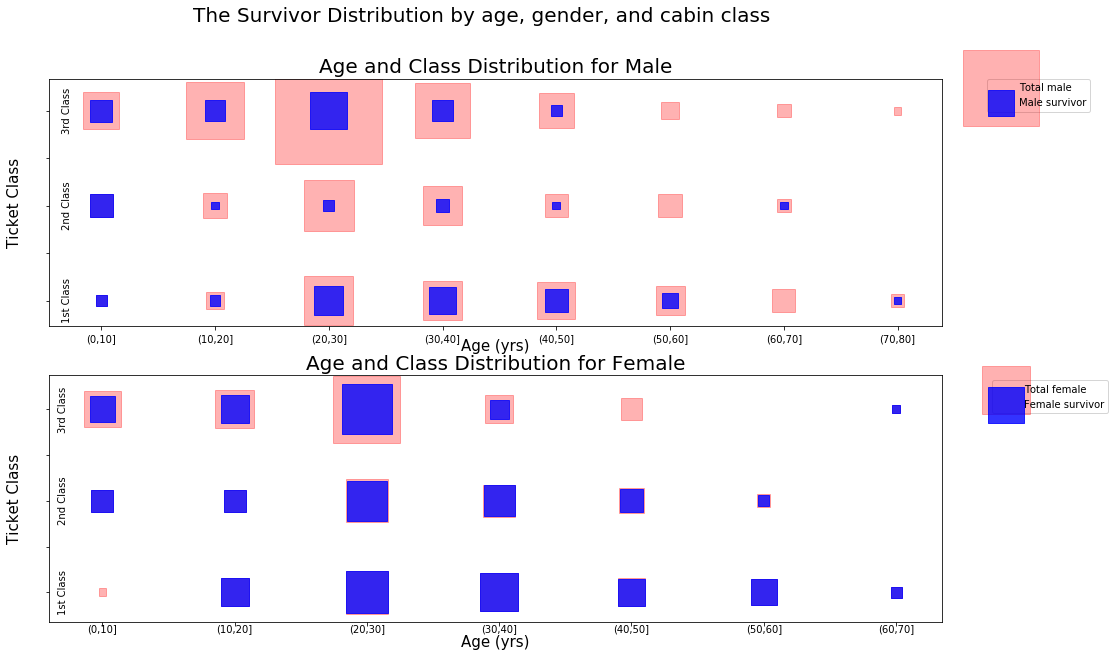

In [31]:
# In order to consider three attributes in the analysis of chance of survival in Titanic incident
# I decided to use the scatter plot, the x,y axis are age and ticket classes, the size of the square in the plot 
# represents the chance of survival for the passenger in the specific age, class group.

# set the figure size
fig = plt.figure(figsize=(16, 10))
fig.suptitle("The Survivor Distribution by age, gender, and cabin class", fontsize = 20)

# ax1 is the first plot which shows survived males' distribution
ax1 = fig.add_subplot(2,1,1)
ax1.set_title("Age and Class Distribution for Male", fontsize=20)
ax1.set_xlabel("Age (yrs)",fontsize=15)
ax1.xaxis.set_label_coords(0.5, -0.05)
ax1.set_ylabel("Ticket Class",fontsize=15)

ax1.tick_params(labelcolor='w')

# the x-axis label will be in munerical format if I don't manulally declare the interval
# here, I use a for-loop to create x-axis labels based on the bined intervals for age
a=0
b=10
char = '('+str(a)+','+str(b)+']'
for i in range(8):
    ax1.text(i,0.6,char,ha='center',va='center')
    a=a+10
    b=b+10
    char = '('+str(a)+','+str(b)+']'

ax1.text(-0.3,1,'1st Class',ha='center',va='center',rotation='vertical')
ax1.text(-0.3,2,'2nd Class',ha='center',va='center',rotation='vertical')
ax1.text(-0.3,3,'3rd Class',ha='center',va='center',rotation='vertical')

# create the scatter plot, x-axis is age, y-axis is ticket class, the marker size represents the population for
# the specific passenger group. (The larger the marker the higher population for the group). 
ax1.scatter(male_total['ageRank'],male_total['pclass'],male_total['onBoard']*60,marker='s',label='Total male',
            alpha=0.3,color='red')

# create the scatter plot, x-axis is age, y-axis is ticket class, the marker size represents the survival chance for
# the specific passenger group. (The larger the marker the higher chance to survive). 
ax1.scatter(male_survived['ageRank'],male_survived['pclass'],male_survived['survived']*60,marker='s',label='Male survivor',
            alpha=0.8,color='blue')
# locate the legend to the side of the plot
ax1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

# do the same chart for female population

# ax2 is the second plot which shows survived females' distribution
ax2 = fig.add_subplot(2,1,2)
ax2.set_title("Age and Class Distribution for Female", fontsize=20)
ax2.set_xlabel("Age (yrs)",fontsize=15)
ax2.xaxis.set_label_coords(0.5, -0.05)
ax2.set_ylabel("Ticket Class",fontsize=15)

ax2.tick_params(labelcolor='w')

# the x-axis label will be in munerical format if I don't manulally declare the interval
# here, I use a for-loop to create x-axis labels based on the bined intervals for age
a=0
b=10
char = '('+str(a)+','+str(b)+']'
for i in range(7):
    ax2.text(i,0.6,char,ha='center',va='center')
    a=a+10
    b=b+10
    char = '('+str(a)+','+str(b)+']'

ax2.text(-0.3,1,'1st Class',ha='center',va='center',rotation='vertical')
ax2.text(-0.3,2,'2nd Class',ha='center',va='center',rotation='vertical')
ax2.text(-0.3,3,'3rd Class',ha='center',va='center',rotation='vertical')

# create the scatter plot, x-axis is age, y-axis is ticket class, the marker size represents the population for
# the specific passenger group. (The larger the marker the higher population for the group). 
ax2.scatter(female_total['ageRank'],female_total['pclass'],female_total['onBoard']*60,marker='s',label='Total female',
            alpha=0.3,color='red')

# create the scatter plot, x-axis is age, y-axis is ticket class, the marker size represents the survival chance for
# the specific passenger group. (The larger the marker the higher chance to survive). 
ax2.scatter(female_survived['ageRank'],female_survived['pclass'],female_survived['survived']*60,marker='s',label='Female survivor',
            alpha=0.8,color='blue')
# locate the legend to the side of the plot
ax2.legend(bbox_to_anchor=(1.05, 1), loc=2)

### 4. Questions and Answers 
#### 4.1 What categories of passengers were most likely to survive the Titanic disaster?

Based on the previous scatter plot ( "The Survivor Distribution by age, gender, and cabin class" in section 3), we can clearly see that: 

1. Female passengers are more likely to survive than male passengers. 
2. Younger passengers have better chance to survive than elder passengers. 
3. Passengers in the higher class (1st class) have much higher survival rate than passengers in the lower classes. 

(Please find detailed explanation of the logic of the analysis in section 3)

#### 4.2 What other attributes did you use for the analysis? Explain how you used them. Provide a complete list of all attributes used.

The complete list of all attributes are list as follows:

- pclass: A proxy for socio-economic status (SES) 1st = Upper 2nd = Middle 3rd = Lower
- age : The age for the passenger
- ageRank: The bucket for each age group (engineered data from the age attribute)
- sex : Male or Female 
- survived : 1 if survived, 0 if not

First of all, I have seperated age into 8 buckets (represented by ageRank). Next, I group the passenger by pclass, ageRank, and sex. After that, I compared the number of survived passengers to the total number of passengers in the specific group to get a sense of what categories of passengers are more likely to survive the titanic disaster. 

#### 4.3.1 Did you engineer any attributes? If yes, explain the rationale and how the new attributes were used in the analysis?

Yes, I have engineered attributes such as: ageBin, ageRank, onBorad. The detail of engineering work is mentioned in previous steps in section 2 and 3.

- ageBin: To cut passengers into multiple groups by age.
- ageRank: Assign numerical ranking value to passenger based on the age group interval
- onBoard: Assign numerical number 1 to all onboarded passengers for calculation purpose 

#### 4.3.2 If you have excluded any attributes from the analysis, provide an explanation why you believe they can be excluded

List of attributes been excluded:
    - sibsp : number of siblings or spouses aboard
    - fare: the ticket fare
    - ticket: the ticket number
    - parch : number of parents / kids aboard
    - embarked: the port of embarkation
    - cabin: the cabin number

The sibsp and parch number have an insignificant or slight relevance to the surviving rate. As mentioned in earlier section: the survival rate goes higher if a passenger has small to midium family size (1-3), but the chance drops when the family size exceeds 3. Therefore, the effect is not consistant or insignificant. 

In addition, ticket is excluded because it's just the numerical number of ticket, it doesn't add additional value.

Ticket fare is an attribute that is closely related to the pclass. We have explored this attribute in the previous sections, and the higher the fare results higher chance to survive. But this is excluded in the final analysis due to redundancy. 

Embarked is the port of embarkation, we have examed this attribute in the previous sections as well. The different location doesn't affect survival chance.

Cabin is excluded due to too much missing value, if we have more value, this attribute can be helpful since we might be able to find the location of the cabin, which can make a difference during the escape.

#### 4.4 How did you treat missing values? Provide a detailed explanation in the comments.

- To find all the missing values in the data frame

data.isnull( ).sum( ).sort_values(ascending=False)

- Complete the missing value for 'age','embarked', and remove unuseful data


    1. complete missing age with median

data['age'] = data['age'].fillna(data['age'].median( ))

    2. complete missing embarked with mode

data['embarked'] = data['embarked'].fillna(data['embarked'].mode( )[0])

    3. clean the data by removing unuseful data
data.drop(['passengerid','cabin', 'ticket'], axis=1, inplace = True)